# 5 - IDF files with other techniques

So far, in the examples, we have only worked with RBS data. However, the IDF format accommodates all IBA techniques, as should pyIBA. Yet, the latter has only been tested with RBS, NRA, PIXE and (despite not exactly IBA) SIMS.

Here we exemplify how pyIBA handles NRA data. In [Example A1](../advanced_examples/Example_a1/Large_IDF_file_RBS-NRA-PIXE-SIMS.ipynb) is shown how we can create an IDF file with experimental data resulting from RBS, NRA, PIXE and SIMS measurements and analysis.
  
The experiment consists of a NRA measurement of a Be sample using $^3$He. We consider 6 reactions:

1. D ($^3$He, H) $^4$He 18.35
2. Be ($^3$He, H) $^{11}$B  10.32
3. Be ($^3$He, H) $^{11}$B  8.19
4. Be ($^3$He, H) $^{11}$B  5.88
5. Be ($^3$He, H) $^{11}$B  5.30
6. $^{12}$C ($^3$He, H) $^{14}$N  4.78

As in [Example 1 - Creating a blank IDF](../Example1/blank_idf.ipynb), we start by creating a blank IDF object.

In [1]:
# if pyIBA has been installed with pip3,
# the above 4 lines can be removed
import sys
from os.path import abspath
path_pyIBA = abspath('../../../..')
sys.path.insert(0, path_pyIBA)

# import pyIBA
from pyIBA import IDF

In [2]:
idf_file = IDF()

## Introducing basic parameters

We then load the spectrum using the same `set_spectrum_data_from_file()` as all the previous examples:

In [3]:
#path to file
NRA_spectrum_path = 'RBS2_Jari_VTT_He_1.dat'

idf_file.set_spectrum_data_from_file(NRA_spectrum_path, mode = '8 columns');

>Note: the NRA data file is presented in a 8 column format, thus we set `mode = '8 columns'`.

Afterwards, we should include the geometry parameters. As done in [Example 1](../Example1/blank_idf.ipynb#Adding-beam-parameters), instead of changing one by one using the `set_` methods, we use `set_geo_parameters()`:

In [4]:
param_dictonary = {'projectile': '3He',
                   'beam_energy': 2300.0,
                   'beam_FWHM': 20.0,
                   'geometry': 'cornell',
                   'angles': ['0', '135'],
                   'dect_solid': '34.00',
                   'energy_calib': [15.4, 280.78],
                   'charge': '1'
                  }

idf_file.set_geo_parameters(param_dictonary)

Finally, we can, and should, set the technique name using:

In [5]:
idf_file.set_technique('NRA')

This will help **pyIBA** to distinguish between techniques, useful to print more appropriate outputs. If no technique is add, **pyIBA** will try an educate guess (which might be wrong) or simply default to assuming RBS technique.

## Introduction the NRA reactions

Up to this point the process was identical to RBS. However, for NRA we also need to include the reactions emitting the detected particles. For this we use `set_reactions()`. For each reaction there should be a reaction dictionary with the respective parameters.

In [6]:
reation1 =  {'initialtargetparticle': 'D',
             'incidentparticle': '3He',
             'exitparticle': '1H',
             'finaltargetparticle': '4He',
             'reactionQ': '18352'}

reation2 =  {'initialtargetparticle': 'Be',
             'incidentparticle': '3He',
             'exitparticle': '1H',
             'finaltargetparticle': '11B',
             'reactionQ': '10321.90'}

reation3 =  {'initialtargetparticle': 'Be',
             'incidentparticle': '3He',
             'exitparticle': '1H',
             'finaltargetparticle': '11B',
             'reactionQ': '8191.00'}

reation4 =  {'initialtargetparticle': 'Be',
             'incidentparticle': '3He',
             'exitparticle': '1H',
             'finaltargetparticle': '11B',
             'reactionQ': '5876.96'}

reation5 =  {'initialtargetparticle': 'Be',
             'incidentparticle': '3He',
             'exitparticle': '1H',
             'finaltargetparticle': '11B',
             'reactionQ': '5300.96'}

reation6 =  {'initialtargetparticle': '12C',
             'incidentparticle': '3He',
             'exitparticle': '1H',
             'finaltargetparticle': '14N',
             'reactionQ': '4779'}

To simplify the process we can create a list with the reaction dictionaries:

In [7]:
reactions_list = [reation1, reation2, reation3, reation4, reation5, reation6]

and add each reaction to the IDF object by looping through the list:

In [8]:
for reaction in reactions_list:
    idf_file.set_reactions(reaction, append=True)

Notice that we set `append = True` (the default value) to append each reaction to the IDF file. If you want to substitute the existing set of reactions by a new one, you can load the first reaction using `append = False` and the following with `append = True`:

In [9]:
#introduce the first reaction while removing the existing ones:
idf_file.set_reactions(reactions_list[0], append = False)

#loop through the remaining reactions:
for reaction in reactions_list[1:]:
    idf_file.set_reactions(reaction, append = True)

## Reading the Reactions

The reaction list can be obtained from the IDF object using `get_reactions()`:

In [10]:
reactions_list = idf_file.get_reactions()

Note that every element of this list corresponds to a reaction reactionary:

In [11]:
reactions_list

[{'initialtargetparticle': 'D',
  'incidentparticle': '3He',
  'exitparticle': '1H',
  'finaltargetparticle': '4He',
  'reactionQ': '18352.00',
  'code': 'D(3He, 1H)4He 18352.00'},
 {'initialtargetparticle': 'Be',
  'incidentparticle': '3He',
  'exitparticle': '1H',
  'finaltargetparticle': '11B',
  'reactionQ': '10321.90',
  'code': 'Be(3He, 1H)11B 10321.90'},
 {'initialtargetparticle': 'Be',
  'incidentparticle': '3He',
  'exitparticle': '1H',
  'finaltargetparticle': '11B',
  'reactionQ': '8191.00',
  'code': 'Be(3He, 1H)11B 8191.00'},
 {'initialtargetparticle': 'Be',
  'incidentparticle': '3He',
  'exitparticle': '1H',
  'finaltargetparticle': '11B',
  'reactionQ': '5876.96',
  'code': 'Be(3He, 1H)11B 5876.96'},
 {'initialtargetparticle': 'Be',
  'incidentparticle': '3He',
  'exitparticle': '1H',
  'finaltargetparticle': '11B',
  'reactionQ': '5300.96',
  'code': 'Be(3He, 1H)11B 5300.96'},
 {'initialtargetparticle': '12C',
  'incidentparticle': '3He',
  'exitparticle': '1H',
  'fin

For instance, if you want to retrieve the reaction formula (in the dictionary named of 'code'):

In [12]:
reactions_formulas = []

for reaction in reactions_list:
    reactions_formulas.append(reaction['code'])
    print(reaction['code'])

D(3He, 1H)4He 18352.00
Be(3He, 1H)11B 10321.90
Be(3He, 1H)11B 8191.00
Be(3He, 1H)11B 5876.96
Be(3He, 1H)11B 5300.96
12C(3He, 1H)14N 4779.00


## Plotting the data

Plotting here is essentially identical to RBS (see [Example 2](../Example2/reading_idf.ipynb)).

In [13]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

# %matplotlib notebook

Text(0, 0.5, 'Counts')

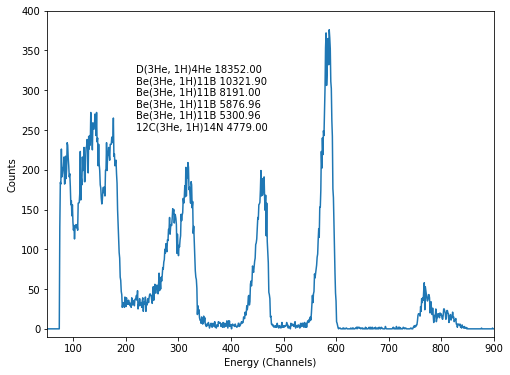

In [14]:
xx, yy = idf_file.get_dataxy()

plt.figure(figsize=(8,6))
plt.plot(xx, yy)

plt.text(220, 250, '\n'.join(reactions_formulas))

plt.xlim(50, 900)
plt.ylim(-10, 400)
plt.xlabel('Energy (Channels)')
plt.ylabel('Counts')